<a href="https://colab.research.google.com/github/So1rymaker/FrontEnd/blob/main/assignment_1_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<a href="https://github.com/So1rymaker/Fall-2023-NYU-AI/blob/main/assignment-1/assignment-1.py" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>


The code below contains all the code needed for assignment 1。



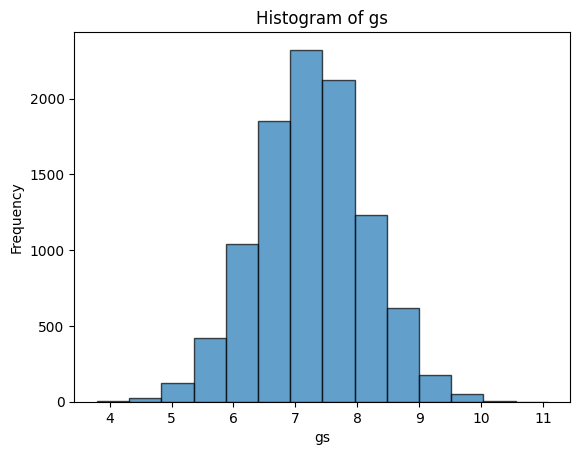

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import numpy
##gs Question 1a
mean = 7.25 #(5.5+9)/2
std = 0.875 #few outlier
gsdata = np.random.normal(mean,std,10000) #take 10,000 samples
plt.hist(gsdata, bins=14, edgecolor='k', alpha=0.7) #replicate plots
plt.title('Histogram of gs')
plt.xlabel('gs')
plt.ylabel('Frequency')
plt.show()
##gs

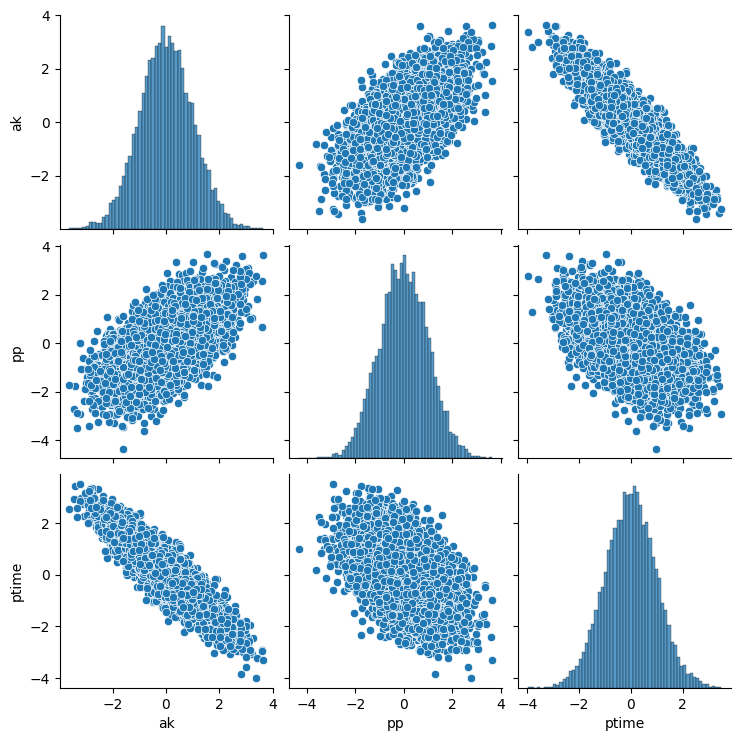

In [2]:
#ak,pp,ptime Question 1b
mean = [0,0,0]
sigma = [[1.0,0.6,-0.9],[0.6,1.0,-0.5],[-0.9,-0.5,1.0]] #sigma in article
data =np.random.multivariate_normal(mean,sigma,10000) #take 10,000 samples(ak,pp,ptime)

pairdata = pd.DataFrame(data=data,columns=["ak","pp","ptime"]) #fit data to Dataframe to help eplicate the associated plots
sns.pairplot(pairdata) #replicate the associated plots
plt.show()
##ak,pp,ptime

In [ ]:
##probability inrtegral transform Question 1c
Udata = stats.norm.cdf(data) #CDF function in scipy
Upairdata = pd.DataFrame(data=Udata,columns=["ak","pp","ptime"])
sns.pairplot(Upairdata)
plt.show()
##probability inrtegral transform

In [ ]:
##inverse transform sampling Question 1d
akdata = data[:,0] #extract ak data
ppdata = data[:,1] #extract pp data
ptimedata = data[:,2] #extract ptime data
Uak = stats.norm.cdf(akdata) #CDF ak
Upp = stats.norm.cdf(ppdata) #CDF pp
Uptime = stats.norm.cdf(ptimedata) #CDF ptime
akpos = stats.poisson.ppf(Uak,5) #make it a Poisson distribution with an average number of air knots of 5 per case
pppos = stats.poisson.ppf(Upp,15) #Possion distribution again for pp
ptimepos = stats.poisson.ppf(Uptime,120,30) #Possion distribution again for ptime

plt.hist(akpos, bins=15, edgecolor='k', alpha=0.7)
plt.title('Histogram of ak')
plt.xlabel('Number of air knots in a case')
plt.ylabel('Frequency')
plt.show()

plt.hist(pppos, bins=15, edgecolor='k', alpha=0.7)
plt.title('Histogram of pp')
plt.xlabel('Number of times resident passes point in a case')
plt.ylabel('Frequency')
plt.show()

plt.hist(ptimepos, bins=12, edgecolor='k', alpha=0.7)
plt.title('Histogram of ptime')
plt.xlabel('ptime')
plt.ylabel('Frequency')
plt.show()
##inverse transform sampling


In [ ]:
##the final plot Question 1e
pairdataAll = pd.DataFrame({'ak':akpos,'pp':pppos,'ptime':ptimepos,'gs':gsdata})
sns.pairplot(pairdataAll)
plt.show()
##the final plot

In [ ]:
#problem2
for i in range(99):
    Xdata = np.array([akpos[i],pppos[i],ptimepos[i],gsdata[i]]) # NO.i arriving data sample but 4*1
    X = Xdata.reshape((len(Xdata),1)) # NO.i arriving data sample(1*n(1*4))
    XT = Xdata.reshape((1,len(Xdata))) # NO.i arriving data sample(n*1(n*1))
    if i == 0 :
        R = np.dot(X,XT)/(i+1) #the first sample correlation matrix
        RLast = R #record last R for next recursion
    else:
        R = (RLast*i+np.dot(X,XT))/(i+1) #recursive
        RLast = R
    sns.heatmap(R, annot=True, cmap='YlGnBu') #draw heat map
    plt.show()

#problem2